# Deep Q-Learner in Neurosmash
## Setup Environment:

In [ ]:
import mxnet as mx
import numpy as np
import pickle

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

from Neurosmash import Environment
from Agent import Random_agent, DQ_Agent, HRM_DQ_Agent, Leftist_agent
from Run_simulation import train, exploit

ip          = "127.0.0.1" # Ip address that the TCP/IP interface listens to (127.0.0.1 by default)
port        = 13000       # Port number that the TCP/IP interface listens to (13000 by default)
size        = 64
timescale   = 10
environment = Environment(ip, port, size, timescale)

ctx=mx.cpu()

rewards = {
    "death": 0,
    "win": 1,
    "constant reward": 0
}

with open('../data/goals/goals64', 'rb') as fp:
    goals = np.asarray(pickle.load(fp))

## Run a the predefined agents in the environment and collect reward (Exploit the learned policy)

In [ ]:
random_agent = Random_agent(ctx=ctx)
random_rewards, _ = exploit(random_agent,environment,300)

In [ ]:
leftist_agent = Leftist_agent(ctx=ctx)
leftist_rewards, _ = exploit(leftist_agent,environment,300)

In [ ]:
dq_agent = DQ_Agent(ctx=ctx)
dq_agent.model.load_parameters("../data/agents/dq_agent", ctx=ctx)
exploit_rewards2, _ = exploit(dq_agent,environment,250)

In [ ]:
hrm_dq_agent = HRM_DQ_Agent(ctx, goals=goals)
hrm_dq_agent.model.load_parameters("../data/agents/hrm_dq_agent", ctx=ctx)
exploit_rewards3, _ = exploit(hrm_dq_agent,environment,250)

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(np.cumsum(random_rewards), label="Random Agent")
plt.plot(np.cumsum(leftist_rewards), label="Leftist Agent")
plt.plot(np.cumsum(train_rewards2+exploit_rewards2), label="DQ")
plt.plot(np.cumsum(train_rewards3+exploit_rewards3), label="DQ + HER")
plt.axvline(x=50, c='black')
plt.text(21,750,"training", fontsize=22)
plt.text(55,750,"exploitation", fontsize=22)
plt.title("Agent performance in Neurosmash", fontsize=22)
plt.xlabel("Episodes", fontsize=18)
plt.ylabel("Cumulative Reward", fontsize=18)
plt.gca().get_xaxis().set_major_locator(MultipleLocator(50.0))
plt.xlim(0)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## Reproduce the graph in the report with predefined data

In [ ]:
with open('../data/rewards/train_rewards2', 'rb') as fp:
    train_rewards2 = list(pickle.load(fp))
with open('../data/rewards/train_rewards3', 'rb') as fp:
    train_rewards3 = list(pickle.load(fp))
with open('../data/rewards/random_rewards', 'rb') as fp:
    random_rewards = list(pickle.load(fp))
with open('../data/rewards/leftist_rewards', 'rb') as fp:
    leftist_rewards = list(pickle.load(fp))
with open('../data/rewards/exploit_rewards2', 'rb') as fp:
    exploit_rewards2 = list(pickle.load(fp))
with open('../data/rewards/exploit_rewards3', 'rb') as fp:
    exploit_rewards3 = list(pickle.load(fp))

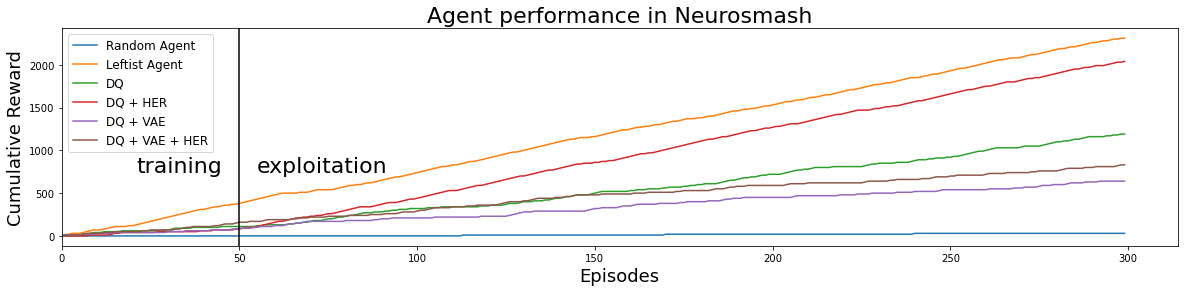

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(np.cumsum(random_rewards), label="Random Agent")
plt.plot(np.cumsum(leftist_rewards), label="Leftist Agent")
plt.plot(np.cumsum(train_rewards2+exploit_rewards2), label="DQ")
plt.plot(np.cumsum(train_rewards3+exploit_rewards3), label="DQ + HER")
plt.axvline(x=50, c='black')
plt.text(21,750,"training", fontsize=22)
plt.text(55,750,"exploitation", fontsize=22)
plt.title("Agent performance in Neurosmash", fontsize=22)
plt.xlabel("Episodes", fontsize=18)
plt.ylabel("Cumulative Reward", fontsize=18)
plt.gca().get_xaxis().set_major_locator(MultipleLocator(50.0))
plt.xlim(0)
plt.legend(loc='upper left', fontsize=12)
plt.show()